In [51]:
import rosbag
from geometry_msgs.msg import Vector3
import rospy

bag = rosbag.Bag('/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/data_record.bag')

import matplotlib.pyplot as plt

position_optitrack = []
position_state_estimate = []
vel_optitrack = []
vel_state_estimate = []

for topic, msg, t in bag.read_messages(topics=['position_Optitrack', 'position_estimate_topic', 'vel_Optitrack', 'vel_estimate_topic']):
    
    if topic == 'position_Optitrack':
        position_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'position_estimate_topic':
        position_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'vel_Optitrack':
        vel_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'vel_estimate_topic':
        vel_state_estimate.append((msg.x, msg.y, msg.z))

# After processing, close the bag
bag.close()


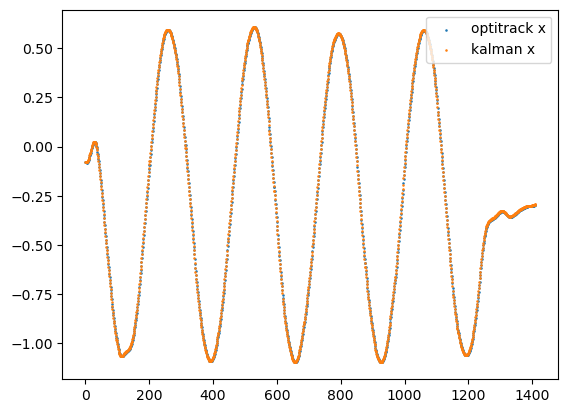

In [57]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[1] for x in position_optitrack], label='optitrack x', s=0.7)
plt.scatter(range(len(position_state_estimate)), [x[1] for x in position_state_estimate], label='kalman x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

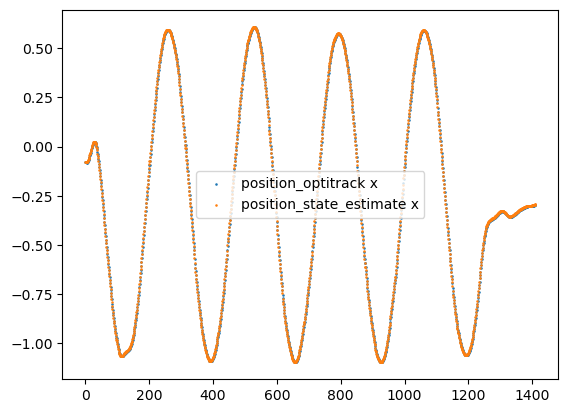

In [53]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[1] for x in position_optitrack], label='position_optitrack x', s=0.7)
plt.scatter(range(len(position_state_estimate)), [x[1] for x in position_state_estimate], label='position_state_estimate x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

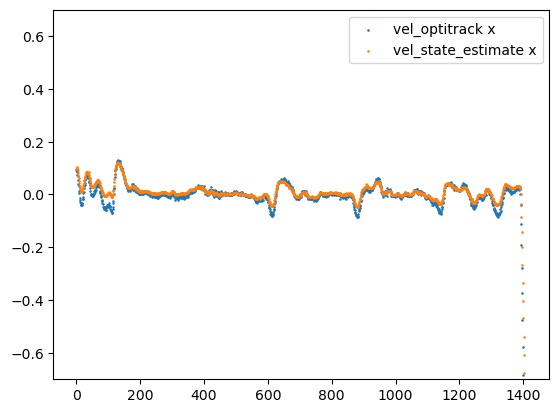

In [60]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[2] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [x[2] for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-0.7, 0.7)
# Add more plots as needed
plt.legend()
plt.show()

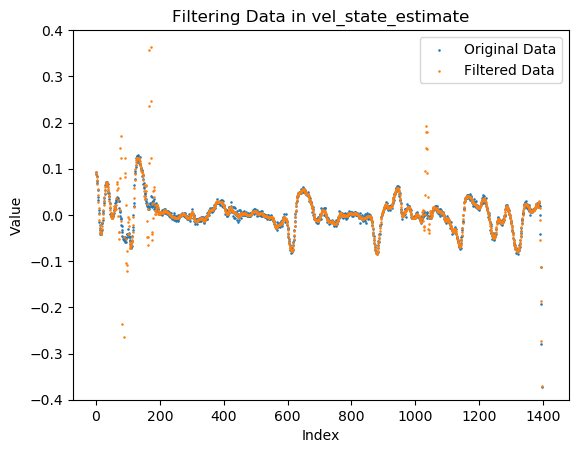

In [66]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Assuming vel_state_estimate is your existing data array
data_to_filter = [x[2] for x in vel_optitrack]  # Extract the data to be filtered

# Sample rate and desired cutoff frequency (example values)
fs = 5000.0  # Sample rate in Hz
cutoff = 500.0  # Cutoff frequency in Hz

# Design a Butterworth lowpass filter (you can change filter type and parameters)
b, a = butter(N=6, Wn=cutoff / (0.5 * fs), btype='low')

# Apply the filter
filtered_data = filtfilt(b, a, data_to_filter)

# Plot the original data
plt.scatter(range(len(data_to_filter)), data_to_filter, label='Original Data', s=0.7)

# Plot the filtered data
plt.scatter(range(len(filtered_data)), filtered_data, label='Filtered Data', s=0.7)

plt.ylim(-0.4, 0.4)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Filtering Data in vel_state_estimate')
plt.legend()
plt.show()


In [127]:
import random

# Generating a random value between -1 and 1
rand_value = random.uniform(-0.05, 0.05)
rand_value

0.014842509156199848

In [128]:
random.uniform(-0, 0)

0.0

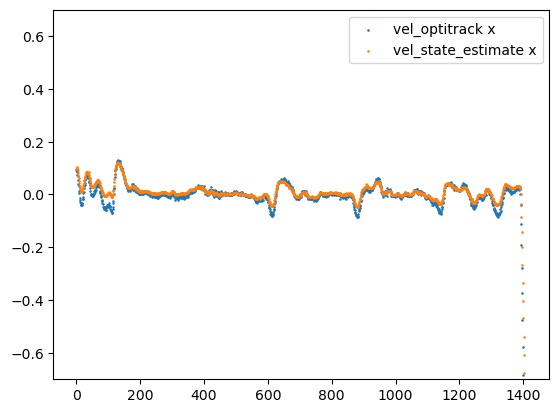

In [63]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[2] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [x[2] for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-0.7, 0.7)
# Add more plots as needed
plt.legend()
plt.show()